# کووڈ-19 وبا کا تخمینہ

## ڈیٹا لوڈ کرنا

ہم کووڈ-19 سے متاثرہ افراد کے ڈیٹا کا استعمال کریں گے، جو [سینٹر فار سسٹمز سائنس اینڈ انجینئرنگ](https://systems.jhu.edu/) (CSSE) نے [جانز ہاپکنز یونیورسٹی](https://jhu.edu/) کے ذریعے فراہم کیا ہے۔ ڈیٹا سیٹ [اس GitHub ریپوزٹری](https://github.com/CSSEGISandData/COVID-19) میں دستیاب ہے۔


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

ہم حالیہ ترین ڈیٹا کو براہ راست GitHub سے `pd.read_csv` استعمال کرتے ہوئے لوڈ کر سکتے ہیں۔ اگر کسی وجہ سے ڈیٹا دستیاب نہ ہو، تو آپ ہمیشہ `data` فولڈر میں موجود مقامی کاپی استعمال کر سکتے ہیں - بس نیچے دی گئی لائن کو ان کومنٹ کریں جو `base_url` کو ڈیفائن کرتی ہے۔


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

ہم دیکھ سکتے ہیں کہ جدول کی ہر قطار ہر ملک اور/یا صوبے کے لئے متاثرہ افراد کی تعداد کو بیان کرتی ہے، اور کالم تاریخوں کے مطابق ہیں۔ اسی طرح کے جدول دیگر ڈیٹا کے لئے بھی لوڈ کیے جا سکتے ہیں، جیسے صحت یاب ہونے والوں کی تعداد اور اموات کی تعداد۔


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## ڈیٹا کو سمجھنا

اوپر دی گئی جدول سے صوبے کے کالم کا کردار واضح نہیں ہے۔ آئیے دیکھتے ہیں کہ `Province/State` کالم میں موجود مختلف اقدار کیا ہیں:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

ہم ناموں سے یہ نتیجہ اخذ کر سکتے ہیں کہ آسٹریلیا اور چین جیسے ممالک میں صوبوں کے لحاظ سے زیادہ تفصیلی تقسیم موجود ہے۔ آئیے چین کے بارے میں معلومات تلاش کریں تاکہ مثال دیکھ سکیں:


In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## ڈیٹا کی پیشگی پروسیسنگ

ہم ممالک کو مزید علاقوں میں تقسیم کرنے میں دلچسپی نہیں رکھتے، اس لیے سب سے پہلے ہم اس تقسیم کو ختم کریں گے اور تمام علاقوں کی معلومات کو اکٹھا کریں گے تاکہ پورے ملک کی معلومات حاصل کی جا سکیں۔ یہ کام `groupby` کا استعمال کرتے ہوئے کیا جا سکتا ہے:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

آپ دیکھ سکتے ہیں کہ `groupby` استعمال کرنے کی وجہ سے تمام ڈیٹا فریمز اب ملک/علاقہ کے ذریعے انڈیکس کیے گئے ہیں۔ ہم اس طرح `.loc` استعمال کرکے کسی مخصوص ملک کا ڈیٹا حاصل کر سکتے ہیں:


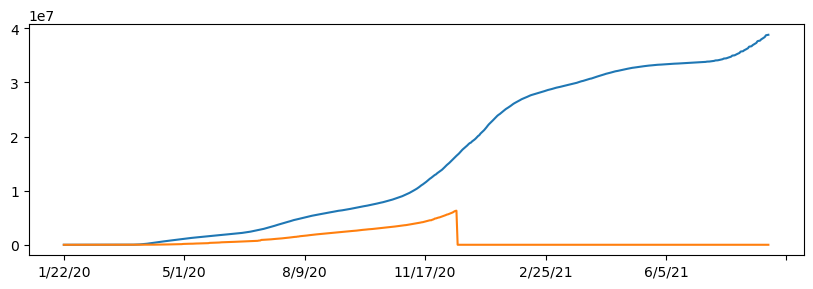

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **نوٹ** کہ ہم `[2:]` استعمال کرتے ہیں تاکہ کسی ترتیب کے پہلے دو عناصر کو ہٹا سکیں جو کسی ملک کے جغرافیائی مقام کو شامل کرتے ہیں۔ ہم ان دو کالموں کو مکمل طور پر ختم بھی کر سکتے ہیں:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## ڈیٹا کی تحقیق

اب کسی مخصوص ملک کی تحقیق کی طرف چلتے ہیں۔ آئیے ایک فریم بناتے ہیں جو تاریخ کے حساب سے درج شدہ انفیکشنز کے ڈیٹا پر مشتمل ہو:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

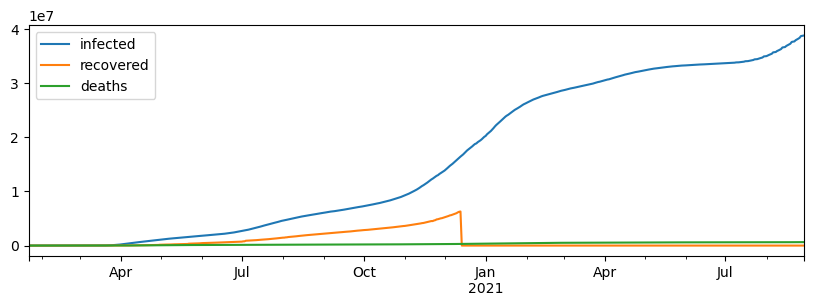

In [134]:
df.plot()
plt.show()

اب آئیے ہر دن نئے متاثرہ افراد کی تعداد کا حساب لگائیں۔ یہ ہمیں وبا کی رفتار کو دیکھنے کی اجازت دے گا۔ یہ کرنے کا سب سے آسان طریقہ `diff` استعمال کرنا ہے۔


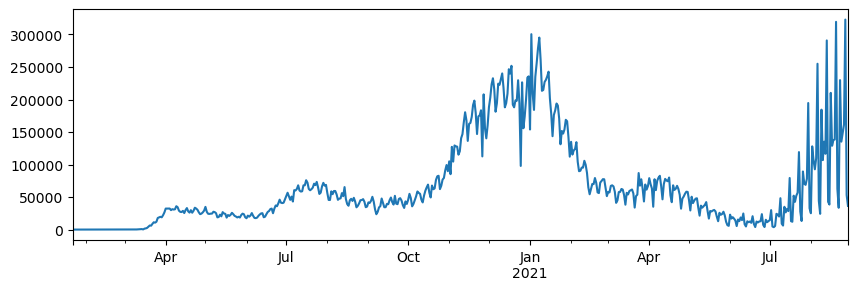

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

ہم ڈیٹا میں زیادہ اتار چڑھاؤ دیکھ سکتے ہیں۔ آئیے مہینوں میں سے ایک کو قریب سے دیکھتے ہیں:


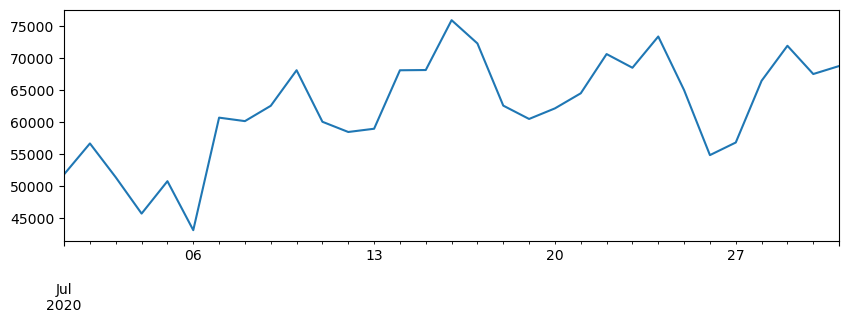

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

یہ واضح طور پر نظر آتا ہے کہ ڈیٹا میں ہفتہ وار اتار چڑھاؤ موجود ہے۔ چونکہ ہم رجحانات کو دیکھنا چاہتے ہیں، اس لیے یہ مناسب ہے کہ گراف کو ہموار کرنے کے لیے چلتی اوسط کا حساب لگایا جائے (یعنی ہر دن کے لیے ہم پچھلے کئی دنوں کی اوسط قیمت کا حساب لگائیں):


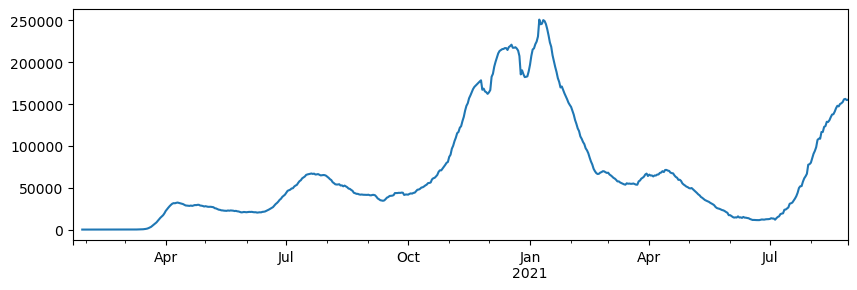

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

تاکہ ہم کئی ممالک کا موازنہ کر سکیں، ہمیں ملک کی آبادی کو مدنظر رکھنا ہوگا، اور ملک کی آبادی کے لحاظ سے متاثرہ افراد کی فیصد کا موازنہ کرنا ہوگا۔ ملک کی آبادی حاصل کرنے کے لیے، آئیے ممالک کے ڈیٹا سیٹ کو لوڈ کرتے ہیں:


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

چونکہ اس ڈیٹاسیٹ میں ممالک اور صوبوں دونوں کی معلومات شامل ہیں، پورے ملک کی آبادی حاصل کرنے کے لیے ہمیں تھوڑا سا ہوشیار ہونا پڑے گا:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

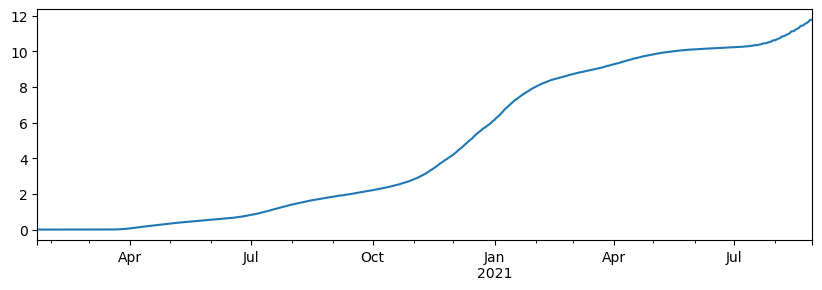

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## $R_t$ کا حساب لگانا

یہ دیکھنے کے لیے کہ بیماری کتنی متعدی ہے، ہم **بنیادی تولیدی عدد** $R_0$ کو دیکھتے ہیں، جو یہ ظاہر کرتا ہے کہ ایک متاثرہ شخص مزید کتنے لوگوں کو متاثر کرے گا۔ جب $R_0$ 1 سے زیادہ ہو، تو وبا کے پھیلنے کا امکان ہوتا ہے۔

$R_0$ بیماری کی اپنی ایک خاصیت ہے اور اس میں وہ حفاظتی اقدامات شامل نہیں ہوتے جو لوگ وبا کو سست کرنے کے لیے اختیار کر سکتے ہیں۔ وبا کے دوران، ہم کسی بھی وقت $t$ پر تولیدی عدد $R_t$ کا اندازہ لگا سکتے ہیں۔ یہ دکھایا گیا ہے کہ اس عدد کا تخمینہ تقریباً 8 دن کی مدت لے کر لگایا جا سکتا ہے، اور اس کا حساب یوں کیا جاتا ہے:  
$$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$  
جہاں $I_t$ دن $t$ پر نئے متاثرہ افراد کی تعداد ہے۔

آئیے اپنے وبائی ڈیٹا کے لیے $R_t$ کا حساب لگاتے ہیں۔ اس کے لیے، ہم `ninfected` کی 8 دن کی ایک مسلسل ونڈو لیں گے، اور اوپر دیے گئے تناسب کو حساب لگانے کے لیے فنکشن کا اطلاق کریں گے:


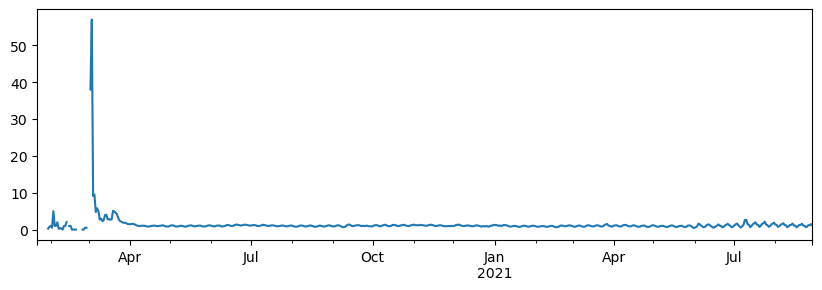

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

آپ دیکھ سکتے ہیں کہ گراف میں کچھ خلا موجود ہیں۔ یہ خلا `NaN` یا `inf` کی موجودگی کی وجہ سے ہو سکتے ہیں۔ `inf` عام طور پر صفر سے تقسیم کرنے کی وجہ سے پیدا ہوتا ہے، اور `NaN` اس وقت ظاہر ہو سکتا ہے جب ڈیٹا غائب ہو یا نتیجہ نکالنے کے لیے کوئی ڈیٹا دستیاب نہ ہو (جیسے ہمارے فریم کے بالکل آغاز میں، جہاں 8 کی چوڑائی والی رولنگ ونڈو ابھی دستیاب نہیں ہے)۔ گراف کو بہتر بنانے کے لیے، ہمیں ان اقدار کو `replace` اور `fillna` فنکشن استعمال کرتے ہوئے بھرنا ہوگا۔

آئیے وبا کے آغاز پر مزید نظر ڈالیں۔ ہم y-axis کی اقدار کو محدود کریں گے تاکہ صرف 6 سے کم اقدار دکھائی دیں، تاکہ بہتر نظر آئے، اور 1 پر ایک افقی لائن کھینچیں۔


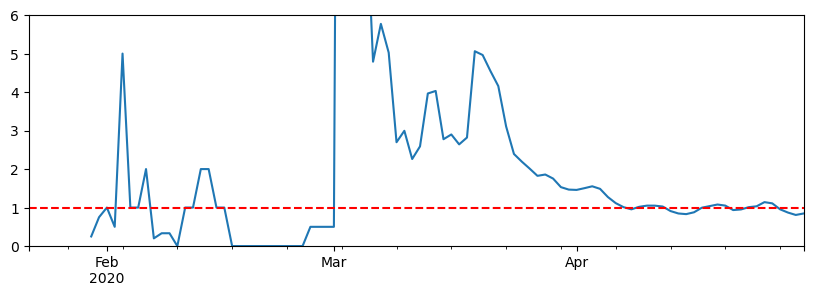

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

ایک اور دلچسپ اشارہ وبا کا **مشتق** یا نئے کیسز میں **روزانہ فرق** ہے۔ یہ ہمیں واضح طور پر دیکھنے کی اجازت دیتا ہے کہ وبا بڑھ رہی ہے یا کم ہو رہی ہے۔


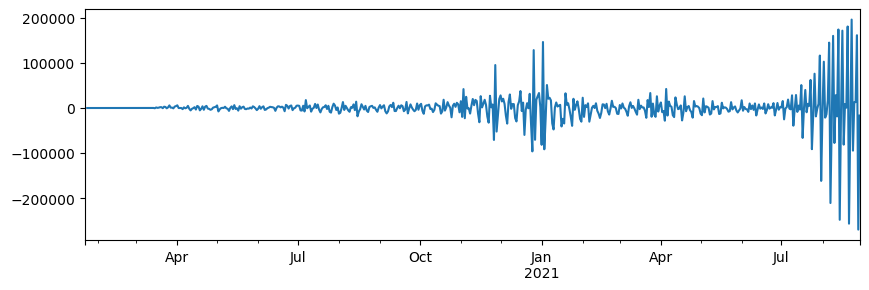

In [143]:
df['ninfected'].diff().plot()
plt.show()

یہ حقیقت مدنظر رکھتے ہوئے کہ رپورٹنگ کی وجہ سے ڈیٹا میں بہت زیادہ اتار چڑھاؤ ہوتا ہے، مجموعی تصویر حاصل کرنے کے لیے رولنگ اوسط چلانے سے منحنی کو ہموار کرنا سمجھ میں آتا ہے۔ آئیے ایک بار پھر وبا کے ابتدائی مہینوں پر توجہ مرکوز کریں:


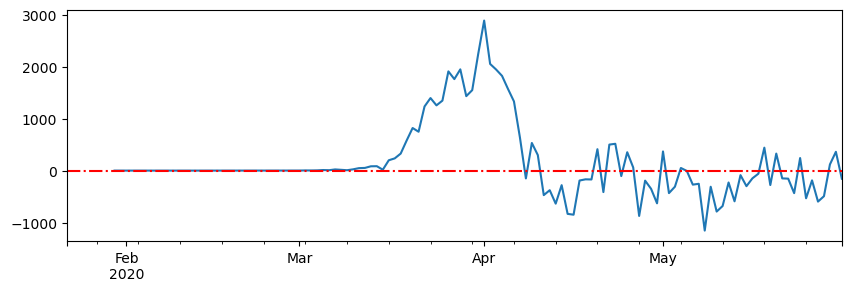

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## چیلنج

اب وقت ہے کہ آپ کوڈ اور ڈیٹا کے ساتھ مزید کھیلیں! یہاں کچھ تجاویز ہیں جن پر آپ تجربہ کر سکتے ہیں:
* مختلف ممالک میں وبا کے پھیلاؤ کو دیکھیں۔
* کئی ممالک کے $R_t$ گرافز کو ایک ہی گراف پر موازنہ کے لیے پلاٹ کریں، یا کئی گرافز کو ساتھ ساتھ بنائیں۔
* دیکھیں کہ اموات اور صحت یابی کی تعداد کس طرح متاثرہ کیسز کی تعداد سے تعلق رکھتی ہے۔
* یہ جاننے کی کوشش کریں کہ ایک عام بیماری کتنے دن تک رہتی ہے، متاثرہ شرح اور اموات کی شرح کو بصری طور پر موازنہ کر کے اور کچھ غیر معمولی چیزوں کو دیکھ کر۔ آپ کو یہ معلوم کرنے کے لیے مختلف ممالک کا جائزہ لینا پڑ سکتا ہے۔
* اموات کی شرح کا حساب لگائیں اور دیکھیں کہ وقت کے ساتھ یہ کیسے تبدیل ہوتی ہے۔ آپ بیماری کے دنوں کی طوالت کو مدنظر رکھنا چاہیں گے تاکہ حسابات کرنے سے پہلے ایک وقت کی سیریز کو شفٹ کیا جا سکے۔


## حوالہ جات

آپ COVID وبا کے پھیلاؤ کے مزید مطالعے کے لیے درج ذیل اشاعتوں کا جائزہ لے سکتے ہیں:
* [COVID وبا کے دوران Rt تخمینہ کے لیے سلائیڈنگ SIR ماڈل](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/)، بلاگ پوسٹ از [دمیتری سوشنیکوف](http://soshnikov.com)
* T.Petrova, D.Soshnikov, A.Grunin. [عالمی COVID-19 وبا کے لیے وقت پر مبنی تولیدی نمبر کا تخمینہ](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [اوپر دیے گئے مقالے کے لیے GitHub پر کوڈ](https://github.com/shwars/SlidingSIR)



---

**ڈسکلیمر**:  
یہ دستاویز AI ترجمہ سروس [Co-op Translator](https://github.com/Azure/co-op-translator) کا استعمال کرتے ہوئے ترجمہ کی گئی ہے۔ ہم درستگی کے لیے کوشش کرتے ہیں، لیکن براہ کرم آگاہ رہیں کہ خودکار ترجمے میں غلطیاں یا غیر درستیاں ہو سکتی ہیں۔ اصل دستاویز کو اس کی اصل زبان میں مستند ذریعہ سمجھا جانا چاہیے۔ اہم معلومات کے لیے، پیشہ ور انسانی ترجمہ کی سفارش کی جاتی ہے۔ ہم اس ترجمے کے استعمال سے پیدا ہونے والی کسی بھی غلط فہمی یا غلط تشریح کے ذمہ دار نہیں ہیں۔
